# Predictive Modelling with Regression

In this notebook, we are using a dataset from kaggle.com were we will try to predict the population with the help of Linear Regression and Decision Tree finding the best model for the purpose of our dataset.

Link to the dataset : https://www.kaggle.com/datasets/ayushparwal2026/country-population-from-1960-to-2022

**Steps Involved:**
1. Data Collection: Download dataset from Kaggle.
2. Data Loading: Load dataset into DataFrame.
3. Initial Exploration: Display head, data types, summary.
4. Data Cleaning: Handle missing values, correct types, remove duplicates.
5. Select a country: For current dataset we need to set a country to do analysis of
6. Data Visualization: Create chart to visualise the data
7. Feature Engineering: Create new features, encode, normalize.
8. Model Preparation: Split data into train/test sets.
9. Model Training: Train linear regression model and decision tree regression model.
10. Model Evaluation: Calculate MSE, R-squared.
11. Hyperparameter Tuning: Use GridSearchCV for best parameters.
12. Report and Evaluation of Performance of the model

In [193]:
# Installing necessary pip packages
!pip install pandas matplotlib scikit-learn seaborn

In [194]:
# Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Loading data to dataframe
df = pd.read_csv('dataset/kaggle/Day-2_Predictive Modelling with Regression/cleaned_data_Task1.csv')

In [195]:
# Overviewing the data 
df.info() # Column with Datatype

df.describe() # Statistical Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1960          266 non-null    float64
 2   1961          266 non-null    float64
 3   1962          266 non-null    float64
 4   1963          266 non-null    float64
 5   1964          266 non-null    float64
 6   1965          266 non-null    float64
 7   1966          266 non-null    float64
 8   1967          266 non-null    float64
 9   1968          266 non-null    float64
 10  1969          266 non-null    float64
 11  1970          266 non-null    float64
 12  1971          266 non-null    float64
 13  1972          266 non-null    float64
 14  1973          266 non-null    float64
 15  1974          266 non-null    float64
 16  1975          266 non-null    float64
 17  1976          266 non-null    float64
 18  1977          266 non-null    

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,1.172860e+08,1.188956e+08,1.210661e+08,1.237484e+08,1.264530e+08,1.291965e+08,1.320558e+08,1.349134e+08,1.378513e+08,1.408944e+08,...,2.927726e+08,2.966485e+08,3.004946e+08,3.043392e+08,3.081897e+08,3.119766e+08,3.156825e+08,3.192718e+08,3.225338e+08,3.254849e+08
std,3.681528e+08,3.726814e+08,3.793723e+08,3.880372e+08,3.967440e+08,4.055817e+08,4.148814e+08,4.241381e+08,4.336812e+08,4.436143e+08,...,9.168878e+08,9.282543e+08,9.394733e+08,9.506238e+08,9.617828e+08,9.726464e+08,9.831785e+08,9.932413e+08,1.002327e+09,1.010250e+09
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.069400e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04
25%,5.191432e+05,5.299130e+05,5.416058e+05,5.539315e+05,5.669115e+05,5.726408e+05,5.714950e+05,5.893528e+05,5.957192e+05,6.001152e+05,...,1.727844e+06,1.760674e+06,1.788377e+06,1.791806e+06,1.813209e+06,1.829052e+06,1.820114e+06,1.817712e+06,1.810651e+06,1.791334e+06
50%,3.850405e+06,3.950443e+06,4.049641e+06,4.167192e+06,4.281604e+06,4.325953e+06,4.382308e+06,4.441042e+06,4.498960e+06,4.569818e+06,...,1.015331e+07,1.034159e+07,1.038195e+07,1.042652e+07,1.044737e+07,1.042760e+07,1.055977e+07,1.065204e+07,1.053749e+07,1.057953e+07
75%,2.739186e+07,2.812822e+07,2.889649e+07,2.968239e+07,3.046628e+07,3.126597e+07,3.183307e+07,3.261431e+07,3.318176e+07,3.385723e+07,...,6.315469e+07,6.364901e+07,6.401981e+07,6.436557e+07,6.467832e+07,6.495070e+07,6.509539e+07,6.573706e+07,6.616680e+07,6.660298e+07
max,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,3.540164e+09,3.614573e+09,...,7.229303e+09,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09


In [196]:
# View first 5 values from the table
df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [197]:
# Removing null values (if any)
print(df.isnull().sum()) # Get number of null values in a column if any

df = df.dropna() # Remove null values

print(df.isnull().sum()) # Get number of null values in a column if any (After cleaning for verification)

df.drop_duplicates(inplace=True) # Removing duplicates from the data

Country Name    0
1960            0
1961            0
1962            0
1963            0
               ..
2018            0
2019            0
2020            0
2021            0
2022            0
Length: 64, dtype: int64
Country Name    0
1960            0
1961            0
1962            0
1963            0
               ..
2018            0
2019            0
2020            0
2021            0
2022            0
Length: 64, dtype: int64


In [198]:
# Converting Year-wise columns to rows
# df.melt() - This helps to unpivot Wide to Long format in our case columns of Years and Population (Transpose function in Excel) - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html
df_melted = df.melt(id_vars=['Country Name'], var_name='Year', value_name='Population')

df_melted['Year'] = df_melted['Year'].astype(int)

In [199]:
# Viewing the formatted data - first 5 values
df_melted.head()

,Country Name,Year,Population
0,Aruba,1960,54608.0
1,Africa Eastern and Southern,1960,130692579.0
2,Afghanistan,1960,8622466.0
3,Africa Western and Central,1960,97256290.0
4,Angola,1960,5357195.0


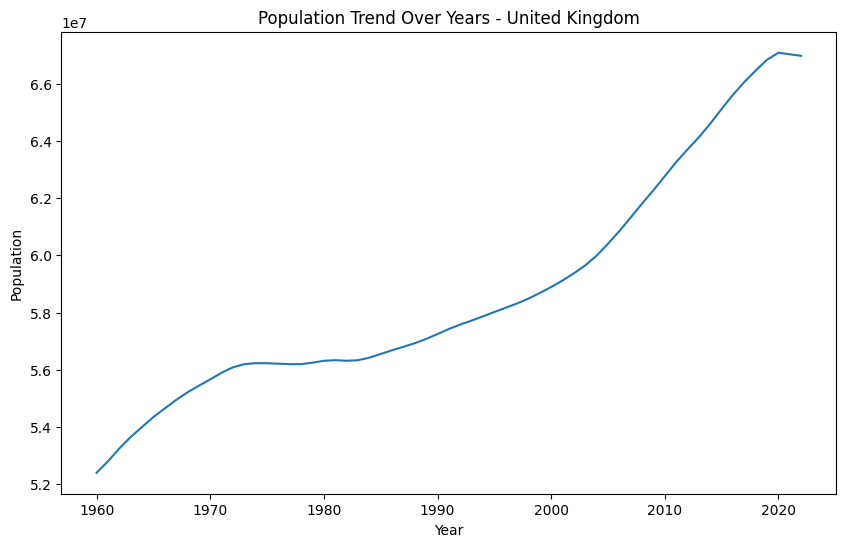

In [200]:
# EDA of the data for certain country
country = 'United Kingdom'

country_df = df_melted[df_melted['Country Name'] == country]

# Graph view of the country data
plt.figure(figsize=(10, 6))
sns.lineplot(data=country_df, x='Year', y='Population')
plt.title(f'Population Trend Over Years - {country}')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [201]:
# Scaling the data
scaler = StandardScaler()
country_df.loc[:, 'Population'] = scaler.fit_transform(country_df[['Population']])

In [202]:
# Preparing data for Further Training and Testing
X = country_df[['Year']]
y = country_df['Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [203]:
# Training model with linear regression
lr = LinearRegression()

# Predicting and finding the best paramters for the model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2, 4, 8] 
}

lr_grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lr_grid_search.fit(X_train, y_train)

print("Best Parameters:", lr_grid_search.best_params_)
print("Best Score:", lr_grid_search.best_score_)


# Model Evaluation
y_pred = lr_grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}
Best Score: -0.10497992362313724
Mean Squared Error: 0.10773641882266462
R-squared Score: 0.9081650706635959


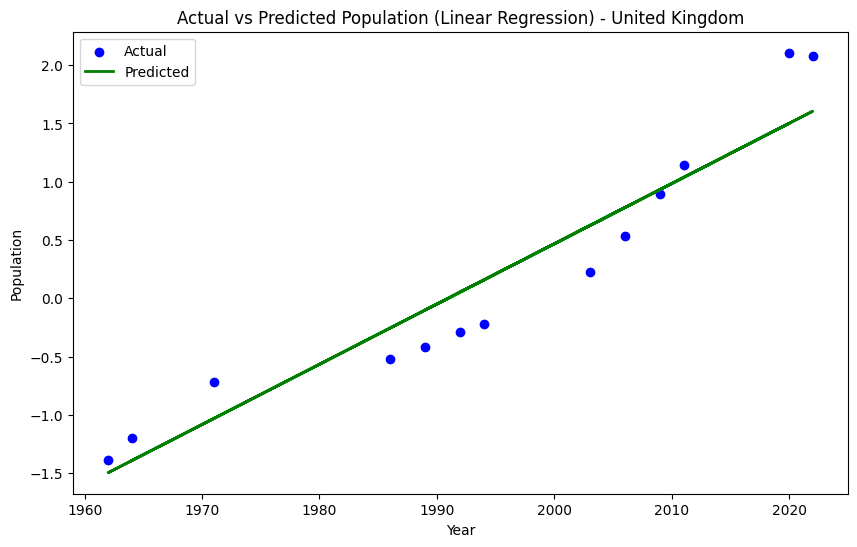

In [204]:
# Visualise - Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Predicted')
plt.title(f'Actual vs Predicted Population (Linear Regression) - {country}')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

In [205]:
# Descision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

# Predicting and finding the best paramters for the model
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30]
}


lr_grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lr_grid_search.fit(X_train, y_train)

print("Best Parameters:", lr_grid_search.best_params_)
print("Best Score:", lr_grid_search.best_score_)


# Model Evaluation
y_pred = lr_grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')



Best Parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: -0.007156496073087398
Mean Squared Error: 0.0062020959218715135
R-squared Score: 0.9947133100677851


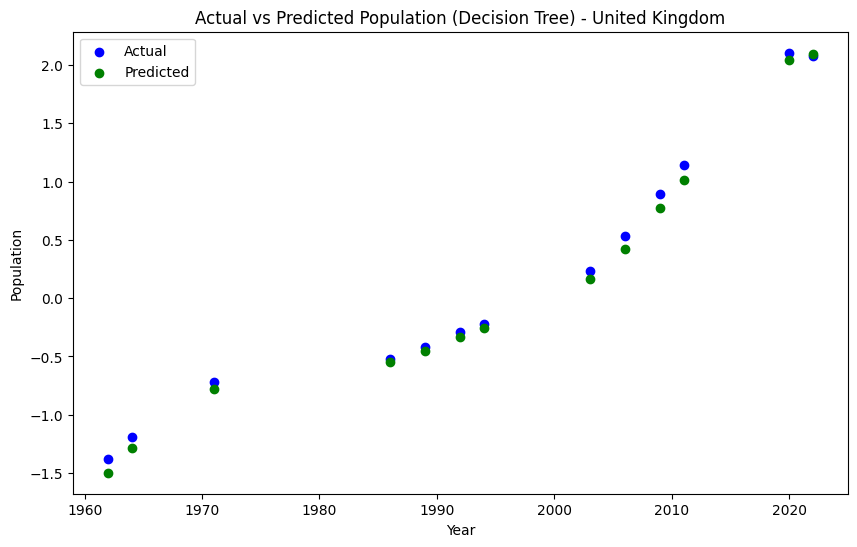

In [206]:
# Visualise
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='green', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title(f'Actual vs Predicted Population (Decision Tree) - {country}')
plt.legend()
plt.show()

# Conclusion

- From the training and testing the model using various machine learning techniques like Linear Regression and Decision Tree enable us to understand how we will be able to predict the future population, I was able to understand the purpose and usage of the various codes which are necessary and visualise the variances from actual and predicted.

- The Decision Tree Regressor outperforms the Linear Regression model in predicting the population data, providing more accurate and precise predictions.
- For future work, consider exploring other advanced models or ensemble methods to potentially improve the prediction accuracy further.

- The Decision Tree model performed exceptionally well with an R-squared score of 0.9947, indicating that it explains approximately 99.47% of the variance in the population data. The MSE is very low (0.0062), showing that the predictions are very close to the actual values. The graph shows that the model fits the data points very closely, aligning well with the actual population values.

- The Linear Regression model also performed well but slightly less than the Decision Tree, with an R-squared score of 0.9082, indicating that it explains approximately 90.82% of the variance in the population data. The MSE is higher (0.1077) compared to the Decision Tree, indicating a larger average squared difference between the actual and predicted values. The graph also shows a linear fit, which captures the general trend but is less precise for certain data points compared to the Decision Tree model.